# Notebook with spectrum analysis

Imports. DO NOT delete this cell

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize
import ipywidgets

# Load the data

In [2]:
df = pd.read_excel("spectrum1.xlsx")

Make sure the data looks good.

In [3]:
df[0:10]

,xdata,ydata
0,300.000000,-2.709187
1,300.400400,54.889020
2,300.800801,326.012356
3,301.201201,12.505634
4,301.601602,-140.863130
5,302.002002,3.298305
6,302.402402,216.980399
7,302.802803,449.699847
8,303.203203,288.792880
9,303.603604,24.352291


Let's plot the data

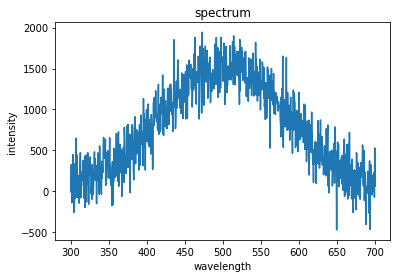

In [4]:
wavelength = df["xdata"]
intensity = df["ydata"]

plt.plot(wavelength, intensity)
plt.xlabel("wavelength")
plt.ylabel("intensity")
plt.title("spectrum")

# Fit the spectrum

Define a model.

$$
y = A \cdot \text{exp} \Big\{ - \frac{(x-B)^2}{2C^2} \Big\}
$$

In [5]:
def gaussian(x, a, b, c):
    """Gaussian function"""
    return a * np.exp(-((x - b)**2/(2*c**2)))

Fit the model

In [6]:
p0 = [500, 10, 10]
params, cov = scipy.optimize.curve_fit(gaussian, wavelength, intensity, p0)

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


plot the model.

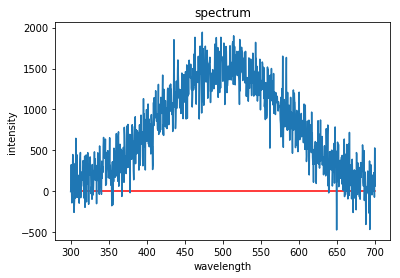

In [7]:
xmodel = np.linspace(300,700,1000)
ymodel = gaussian(xmodel, *params)

plt.plot(xmodel, ymodel, "r")
plt.plot(wavelength, intensity)
plt.xlabel("wavelength")
plt.ylabel("intensity")
plt.title("spectrum")

Widget to get find an appropriate fit.

In [9]:
@ipywidgets.interact
def fitter(a=(0,3000,100), b=(0,1000, 100), c=(0,1000,100)):
    p0 = [a,b,c]
    params, cov = scipy.optimize.curve_fit(gaussian, wavelength, intensity, p0)
    xmodel = np.linspace(300,700,1000)
    ymodel = gaussian(xmodel, *params)

    plt.plot(wavelength, intensity)

    plt.plot(xmodel, ymodel, "r")
    plt.xlabel("wavelength")
    plt.ylabel("intensity")
    plt.title("spectrum")
    print(params)

A Jupyter Widget